In [36]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
data="../dataset/augmented_sample.csv"

In [38]:
# TODO: Create more data
dataframe = pd.read_csv(data)

In [39]:
dataframe.head()

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone,Season
0,239,124,142,250,232,224,182,226,211,216,167,177,white,spring
1,232,180,184,238,214,211,164,147,147,103,89,94,white,spring
2,251,231,198,180,248,200,160,231,229,255,174,188,white,spring
3,5,68,94,24,154,180,117,230,218,212,241,244,white,summer
4,231,210,204,185,183,189,134,139,142,238,237,231,white,spring


In [40]:
label_encoder = preprocessing.LabelEncoder()
dataframe["Skintone"] = label_encoder.fit_transform(dataframe["Skintone"])
dataframe["Season"] = label_encoder.fit_transform(dataframe["Season"])
dataframe

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4,Skintone,Season
0,239,124,142,250,232,224,182,226,211,216,167,177,2,1
1,232,180,184,238,214,211,164,147,147,103,89,94,2,1
2,251,231,198,180,248,200,160,231,229,255,174,188,2,1
3,5,68,94,24,154,180,117,230,218,212,241,244,2,2
4,231,210,204,185,183,189,134,139,142,238,237,231,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,155,142,139,230,222,211,51,135,93,218,102,80,2,1
3996,90,145,187,235,81,94,211,192,178,11,9,9,2,1
3997,69,97,119,47,217,239,5,179,235,234,234,230,2,1
3998,35,26,26,0,115,92,247,135,44,181,177,172,2,1


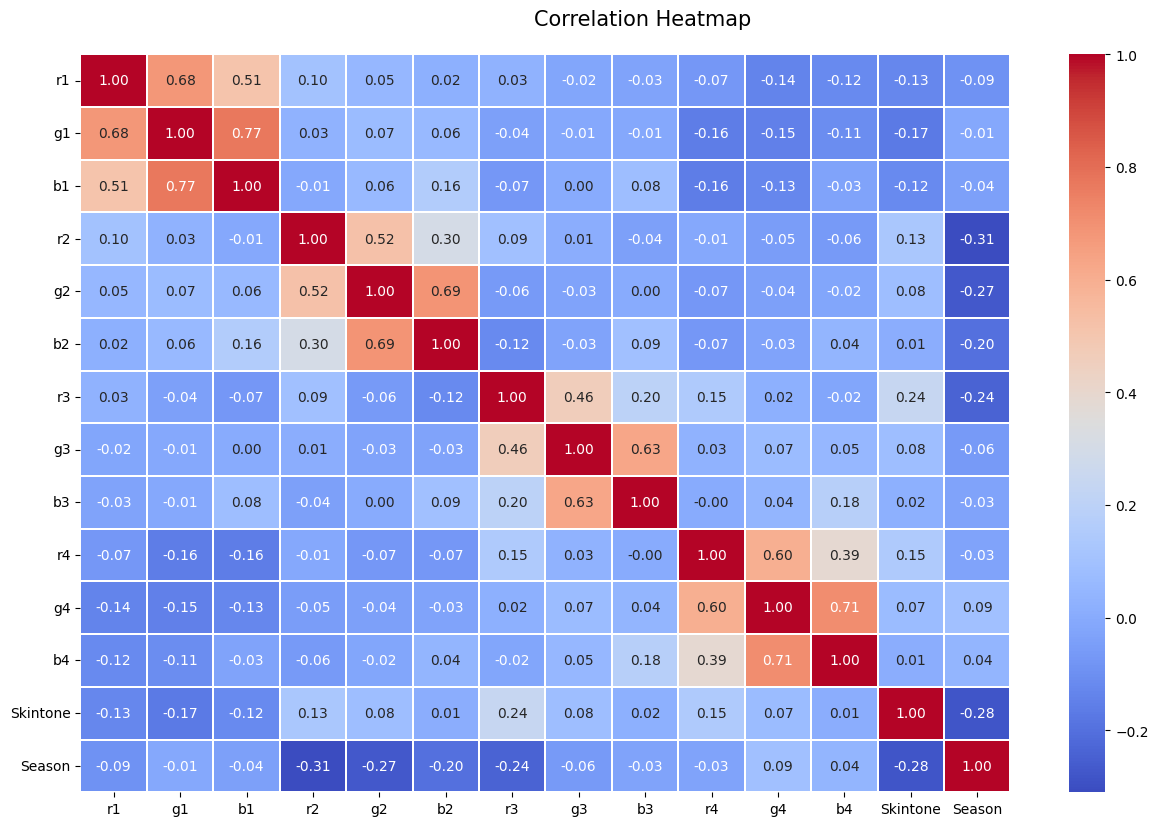

In [41]:
f, ax = plt.subplots(figsize=(15, 9))
corr = dataframe.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

In [42]:
input_sequence = dataframe.copy()
_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r1', 'g1', 'b1']]).T
target_sequence = pd.DataFrame([input_sequence.pop(x) for x in ['r2','g2','b2','r3','g3','b3','r4','g4','b4']]).T


In [43]:
input_sequence

,Skintone,Season
0,2,1
1,2,1
2,2,1
3,2,2
4,2,1
...,...,...
3995,2,1
3996,2,1
3997,2,1
3998,2,1


In [44]:
target_sequence

,r1,g1,b1,r2,g2,b2,r3,g3,b3,r4,g4,b4
0,239,124,142,250,232,224,182,226,211,216,167,177
1,232,180,184,238,214,211,164,147,147,103,89,94
2,251,231,198,180,248,200,160,231,229,255,174,188
3,5,68,94,24,154,180,117,230,218,212,241,244
4,231,210,204,185,183,189,134,139,142,238,237,231
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,155,142,139,230,222,211,51,135,93,218,102,80
3996,90,145,187,235,81,94,211,192,178,11,9,9
3997,69,97,119,47,217,239,5,179,235,234,234,230
3998,35,26,26,0,115,92,247,135,44,181,177,172


In [45]:
X_train, X_test, y_train, y_test = train_test_split(input_sequence, target_sequence, test_size=0.33)

In [46]:
model = tf.keras.models.Sequential([
    layers.Dense(64, input_shape=(2,), activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    # layers.Dense(12)
    layers.Dense(3)
])

In [47]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                192       
                                                                 
 dense_19 (Dense)            (None, 128)               8320      
                                                                 
 dense_20 (Dense)            (None, 256)               33024     
                                                                 
 dense_21 (Dense)            (None, 256)               65792     
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dense_23 (Dense)            (None, 128)               65664     
                                                                 
 dense_24 (Dense)            (None, 64)               

In [49]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [50]:
# Train the model

history = model.fit(X_train, y_train, 
                    validation_split=0.3, 
                    epochs=100, 
                    batch_size=1, 
                    verbose=1,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)


Epoch 1/100
1874/1875 [============================>.] - ETA: 0s - loss: 6542.4712 - accuracy: 0.1644
Epoch: 0, accuracy:0.1643,  loss:6541.1421,  val_accuracy:0.1814,  val_loss:6014.7104,  
1875/1875 [==============================] - 10s 4ms/step - loss: 6541.1421 - accuracy: 0.1643 - val_loss: 6014.7104 - val_accuracy: 0.1814
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 6117.6509 - accuracy: 0.1643 - val_loss: 6239.6504 - val_accuracy: 0.1888
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 6010.9517 - accuracy: 0.1765 - val_loss: 5843.8560 - val_accuracy: 0.1888
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 5941.3940 - accuracy: 0.1701 - val_loss: 5808.3423 - val_accuracy: 0.1814
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 5894.1255 - accuracy: 0.1680 - val_loss: 5803.0928 - val_accuracy: 0.1540
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/s

KeyboardInterrupt: 

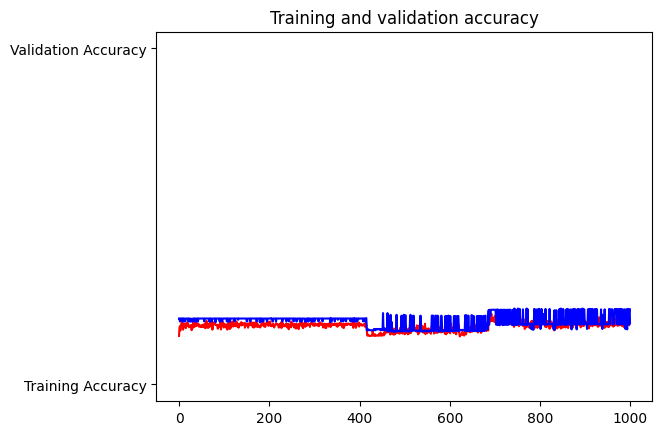

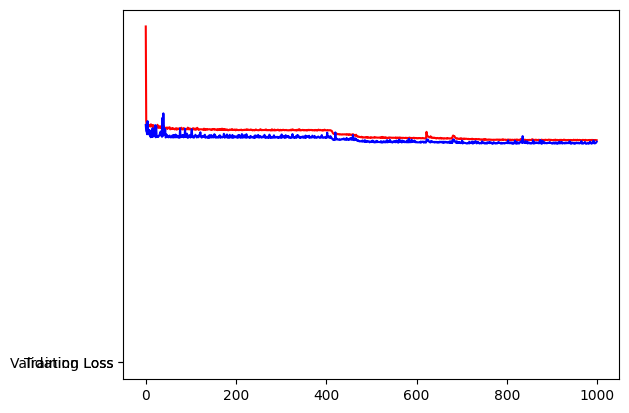

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

1/1 [==============================] - 0s 112ms/step
[[200.66667  188.69893  167.67177  156.95006  159.95029  167.90633
   91.94154  124.86977  131.37497  118.790344 148.59314  157.36353 ]]


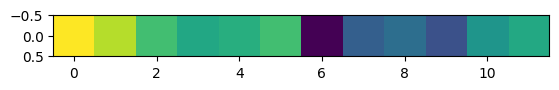

In [ ]:
from sklearn.preprocessing import StandardScaler
data=[[2,2]]

test_input = np.array(data)
scaler = StandardScaler()
scaled_input=scaler.fit_transform(data)
predictions = model.predict(scaled_input)
predictions= predictions
# Print the predictions
print(predictions)
predictions = predictions.reshape((1, -1))
plt.imshow(predictions)
plt.show()

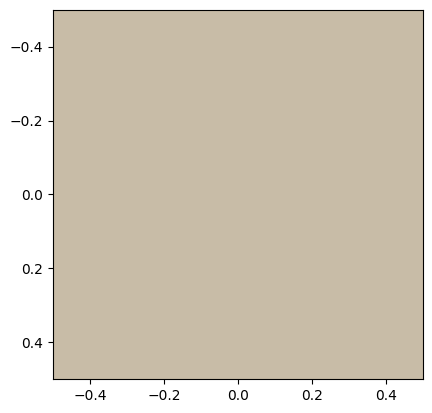

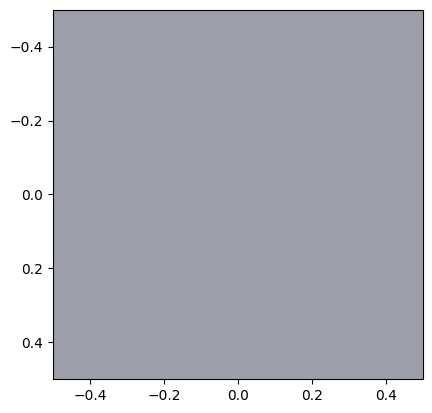

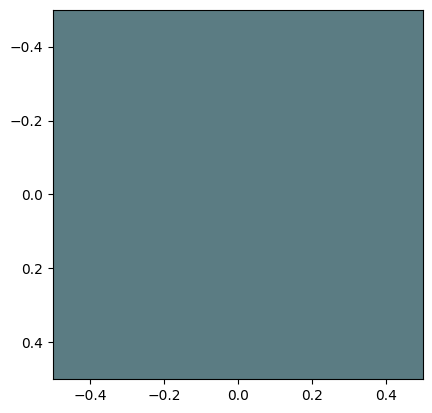

In [ ]:
plt.imshow([[[x / 255 for x in predictions[0][0:3]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][3:6]]]])
plt.show()
plt.imshow([[[x / 255 for x in predictions[0][6:9]]]])
plt.show()